# CH 12 - Optical Interference Films

In [2]:
import numpy as np
from numpy import sin, cos, tan, e, pi, sqrt
import math
import matplotlib.pyplot as plt

## Antireflection Systems
- **Example 12.1**: Demonstrate the effect of an antirefleciton coating. A glass substrate (n_s = 1.5) is to be antireflection-coated to operate at 600 nm. The quarter-wavelength-thick coating is to be evaluated for the index of refraction of sqrt(n); MgF; n_g over the range of a Si detector. Assume a constant index of refraction over the range of wavelengths.

In [43]:
# parameters
nS = 1.5       # index of refection for substrate
nA = 1.0       # IoR air
CWL = 600e-10  # central wavelength

myData = np.zeros([10000,2], dtype=complex)

1.224744871391589
1.3778
1.5


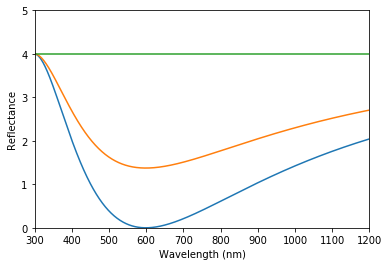

In [56]:
# scan wavelengths in Angstroms
n_list = [sqrt(nS), 1.3778, 1.5]

for n in n_list:
    print(n)
    w = CWL/n/4
    for l in range(1,10001):
        lambda_ = l*1e-10
        k = 2*pi*n/lambda_

        # transfer matrix elements
        A = cos(k*w)
        B = -1j/n*sin(k*w)
        C = -1j*n*sin(k*w)
        D = cos(k*w)

        # reflectance
        r = (A*nA + B*nA*nS - C - D*nS)/(A*nA + B*nA*nS + C + D*nS)
        R = r*np.conj(r)

        # data array
        myData[l-1,0] = l
        myData[l-1,1] = R*100
    plt.plot(myData[:,1])
    plt.axis([300,1200, 0,5])  # plot for visible wavelengths
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')

## High-Reflectance Systems
* **Example 12.2** Use the approximate index of refractions of MgF (L, low layer) and ZnS (H, high layer) to mirror a glass substrate using 1, 3, 5, and 11 HL pairs.

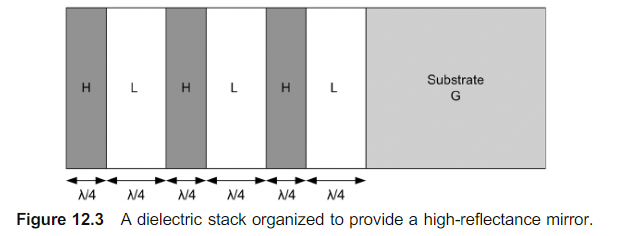

In [88]:
# parameters
nA = 1.0
nS = 1.5
n = [1.3775, 2.3625]
CWL = 600e-9
w = [CWL/n[0]/4, CWL/n[1]/4]
cMax = 2
myData = np.zeros([12000,2], dtype=complex)

11


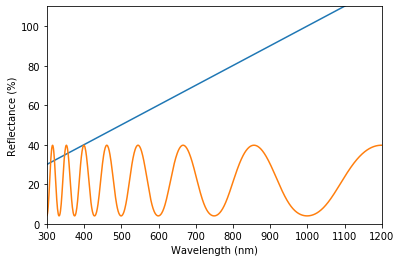

In [118]:
N_list = [11]

for N in N_list:
    print(N)
    for l in range(1, 12000):
        lambda_ = l*1e-10
        k = np.zeros(cMax, dtype=complex)
        A = np.zeros(cMax, dtype=complex)
        B = np.zeros(cMax, dtype=complex)
        C = np.zeros(cMax, dtype=complex)
        D = np.zeros(cMax, dtype=complex)
        
        for c in range(0, cMax):
            k[c] = 2*pi*n[c] / lambda_
            A[c] = cos(k[c]*w[c])
            B[c] = -1j / n[c] * sin(k[c]*w[c])
            C[c] = -1j * n[c] * sin(k[c]*w[c])
            D[c] = cos(k[c]*w[c])

        L = np.array([
            [A[0], B[0]], 
            [C[0], D[0]]
        ])
        H = np.array([
            [A[1], B[1]], 
            [C[1], D[1]]
        ])
        M = np.dot(H,L)**N

        A = M[0,0]
        B = M[0,1]
        C = M[1,0]
        D = M[1,1]

        r = (A*nA + B*nA*nS - C - D*nS)/(A*nA + B*nA*nS + C + D*nS)
        R = r*np.conj(r)

        myData[l-1, 0] = l/10
        myData[l-1, 1] = R*100

    plt.plot(myData)
    plt.axis([300,1200, 0,110])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (%)')

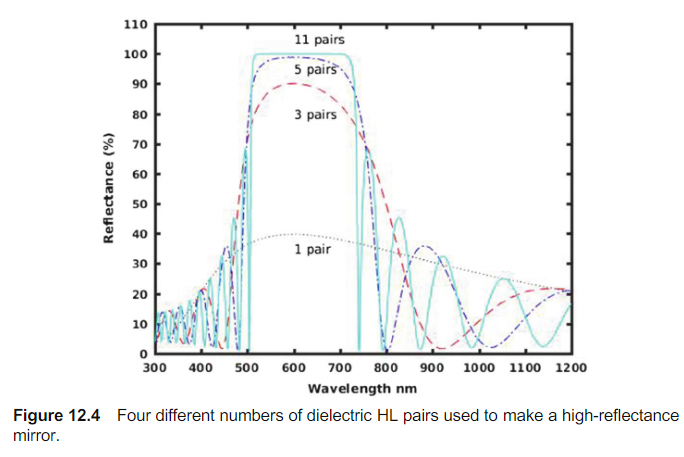

## Bandpass Filters
* **Example 12.3**: Use the approximate indices of refraction of MgF (L) and ZnS (H) to generate a bandpass filter.

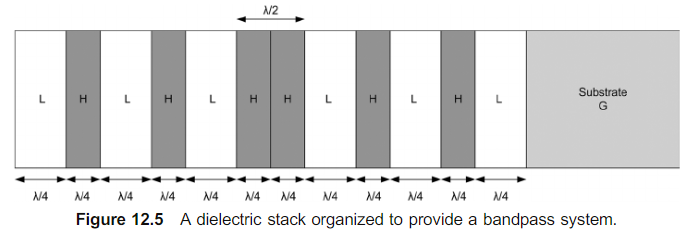

In [119]:
# paramters
nA = 1.0
nS = 1.5
n = [1.3775, 2.3625]

CWL = 600e-9
w = [CWL/n[0]/4, CWL/n[1]/4]
cMax = 2

In [125]:
for l in range(1, 12000):
        lambda_ = l*1e-10
        
        k = np.zeros(cMax, dtype=complex)
        A = np.zeros(cMax, dtype=complex)
        B = np.zeros(cMax, dtype=complex)
        C = np.zeros(cMax, dtype=complex)
        D = np.zeros(cMax, dtype=complex)
        
        for c in range(0, cMax):
            k[c] = 2*pi*n[c] / lambda_
            A[c] = cos(k[c]*w[c])
            B[c] = -1j / n[c] * sin(k[c]*w[c])
            C[c] = -1j * n[c] * sin(k[c]*w[c])
            D[c] = cos(k[c]*w[c])

        L = np.array([
            [A[0], B[0]], 
            [C[0], D[0]]
        ])
        H = np.array([
            [A[1], B[1]], 
            [C[1], D[1]]
        ])
        MF = L.dot(H).dot(L).dot(H).dot(L).dot(H).dot(L).dot(H)
        MB = H.dot(L).dot(H).dot(L).dot(H).dot(L).dot(H).dot(L)
        MC = L.dot(H).dot(H).dot(L)
        M = MF.dot(MC).dot(MB)
        
        A = M[0,0]
        B = M[0,1]
        C = M[1,0]
        D = M[1,1]

        r = (A*nA + B*nA*nS - C - D*nS)/(A*nA + B*nA*nS + C + D*nS)
        R = r*np.conj(r)

        myData[l-1, 0] = l/10
        myData[l-1, 1] = R*100

[550, 650, 0, 110]

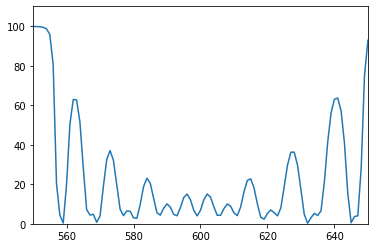

In [127]:
plt.plot(myData[:,1])
plt.axis([550, 650, 0, 110])

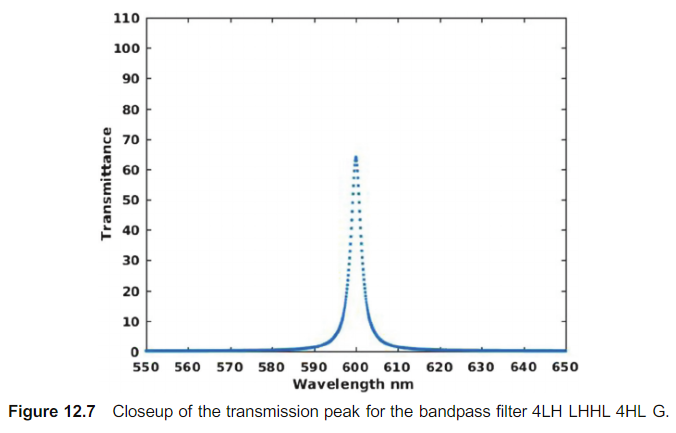